# This file takes downloaded WOD data featuring oxygen measurements in the northern Humboldt Current system and plots the data distribution
author: Eike Koehn 

date: Dec 5, 2018


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import glob
import scipy as sp
import cmocean as cm
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import datetime as datetime

In [2]:
######################
## CTD ##
######################
path_CTD = '/home/koehne/Documents/PhD_projects/HUMPAC15_Model_evaluation/WOD/ocldb1544003509.30338.CTD/'
filelist_CTD = glob.glob(path_CTD+'wod*.nc')
# these profiles are all profiles received from WOD upon data request on Dec 5, 2018 (see Email at 11:35am from WODselect@noaa.gov)

o2_lims = [0.,350.]
print(len(filelist_CTD))
time_ctd = []
lat_ctd = []
lon_ctd = []

for i in range(len(filelist_CTD)):
    fid = xr.open_dataset(filelist_CTD[i])
    time_ctd.append(fid.time.values)
    lat_ctd.append(fid.lat.values)
    lon_ctd.append(fid.lon.values)
    fid.close()
    
time_ctd_new = [np.datetime64(time_ctd[i]) for i in range(len(time_ctd))]
lat_ctd_new = np.asarray(lat_ctd)
lon_ctd_new = np.asarray(lon_ctd)

2833


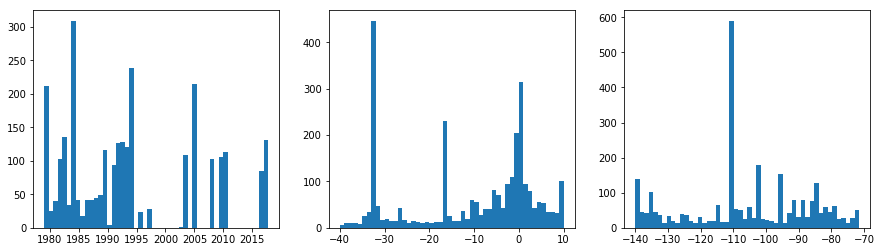

In [3]:
fig = plt.figure(figsize=(15,4))
#month_bins_start = np.datetime64('1979-01-01T00:00:00')
ax = fig.add_subplot(131)
ax.hist(time_ctd_new,50)

ax2 = fig.add_subplot(132)
ax2.hist(lat_ctd_new,50)

ax3 = fig.add_subplot(133)
ax3.hist(lon_ctd_new,50)
plt.show()

In [4]:
######################
## OSD ##
######################
path_OSD = '/home/koehne/Documents/PhD_projects/HUMPAC15_Model_evaluation/WOD/ocldb1544003509.30338.OSD/'
filelist_OSD = glob.glob(path_OSD+'wod*.nc')
# these profiles are all profiles received from WOD upon data request on Dec 5, 2018 (see Email at 11:35am from WODselect@noaa.gov)

o2_lims = [0.,350.]
print(len(filelist_OSD))
time_osd = []
lat_osd = []
lon_osd = []

for i in range(len(filelist_OSD)):
    fid = xr.open_dataset(filelist_OSD[i])
    time_osd.append(fid.time.values)
    lat_osd.append(fid.lat.values)
    lon_osd.append(fid.lon.values)
    fid.close()
    
time_osd_new = [np.datetime64(time_osd[i]) for i in range(len(time_osd))]
lat_osd_new = np.asarray(lat_osd)
lon_osd_new = np.asarray(lon_osd)

1938


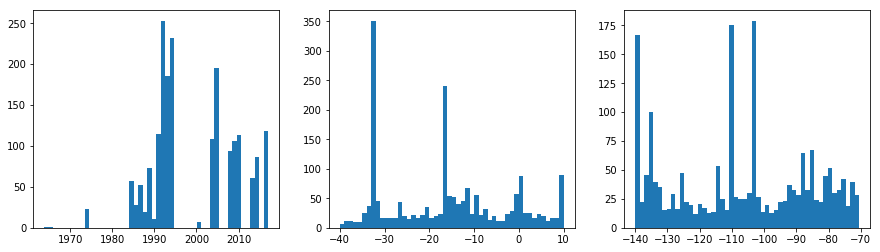

In [5]:
fig = plt.figure(figsize=(15,4))
#month_bins_start = np.datetime64('1979-01-01T00:00:00')
ax = fig.add_subplot(131)
ax.hist(time_osd_new,50)

ax2 = fig.add_subplot(132)
ax2.hist(lat_osd_new,50)

ax3 = fig.add_subplot(133)
ax3.hist(lon_osd_new,50)
plt.show()

In [6]:
######################
## PFL ##
######################
path_PFL = '/home/koehne/Documents/PhD_projects/HUMPAC15_Model_evaluation/WOD/ocldb1544003509.30338.PFL/'
filelist_PFL = glob.glob(path_PFL+'wod*.nc')
# these profiles are all profiles received from WOD upon data request on Dec 5, 2018 (see Email at 11:35am from WODselect@noaa.gov)

o2_lims = [0.,350.]
print(len(filelist_PFL))
time_pfl = []
lat_pfl = []
lon_pfl = []

for i in range(len(filelist_PFL)):
    fid = xr.open_dataset(filelist_PFL[i])
    time_pfl.append(fid.time.values)
    lat_pfl.append(fid.lat.values)
    lon_pfl.append(fid.lon.values)
    fid.close()
    
time_pfl_new = [np.datetime64(time_pfl[i]) for i in range(len(time_pfl))]
lat_pfl_new = np.asarray(lat_pfl)
lon_pfl_new = np.asarray(lon_pfl)

9544


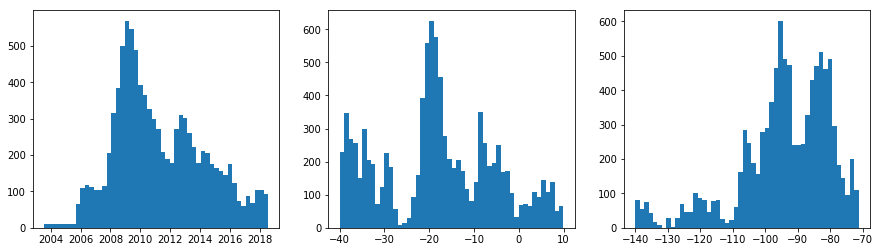

In [7]:
fig = plt.figure(figsize=(15,4))
#month_bins_start = np.datetime64('1979-01-01T00:00:00')
ax = fig.add_subplot(131)
ax.hist(time_pfl_new,50)

ax2 = fig.add_subplot(132)
ax2.hist(lat_pfl_new,50)

ax3 = fig.add_subplot(133)
ax3.hist(lon_pfl_new,50)
plt.show()

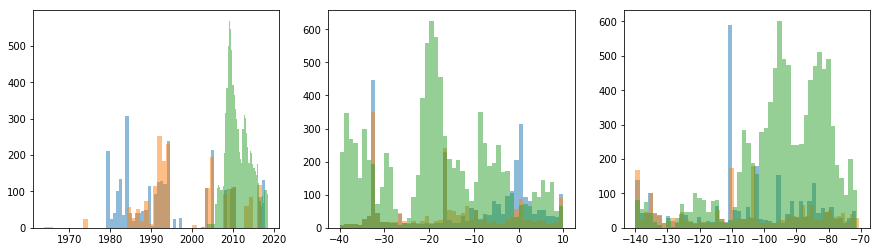

In [8]:
fig = plt.figure(figsize=(15,4))
#month_bins_start = np.datetime64('1979-01-01T00:00:00')
ax = fig.add_subplot(131)
ax.hist(time_ctd_new,50,alpha=0.5)
ax.hist(time_osd_new,50,alpha=0.5)
ax.hist(time_pfl_new,50,alpha=0.5)

ax2 = fig.add_subplot(132)
ax2.hist(lat_ctd_new,50,alpha=0.5)
ax2.hist(lat_osd_new,50,alpha=0.5)
ax2.hist(lat_pfl_new,50,alpha=0.5)

ax3 = fig.add_subplot(133)
ax3.hist(lon_ctd_new,50,alpha=0.5)
ax3.hist(lon_osd_new,50,alpha=0.5)
ax3.hist(lon_pfl_new,50,alpha=0.5)

plt.show()

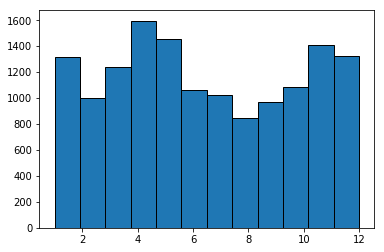

In [33]:
time_all = np.hstack((time_ctd_new, time_osd_new, time_pfl_new))
lat_all = np.hstack((lat_ctd_new, lat_osd_new, lat_pfl_new))
lon_all = np.hstack((lon_ctd_new, lon_osd_new, lon_pfl_new))

import pandas as pd
dates = pd.DatetimeIndex(time_all)
dates.month
plt.subplots()
plt.hist(dates.month,12,edgecolor='k')
plt.show()

<IPython.core.display.Javascript object>


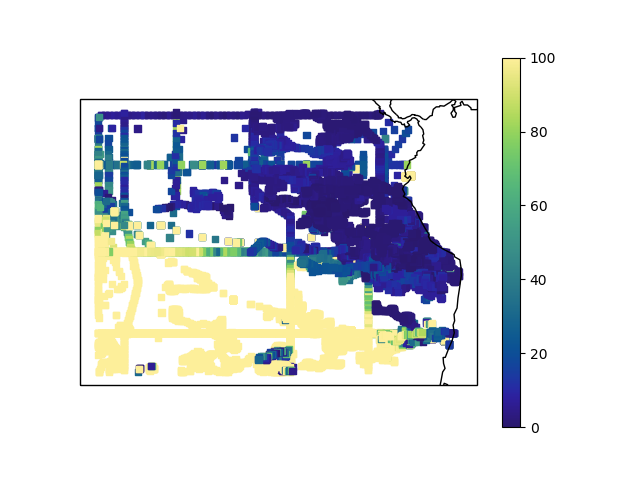

2833 1938 9544
0
1000
2000
CTD done.
0
1000
OSD done.
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
PFL done.


In [138]:
# CTD 
for i in range(len(filelist_CTD)):
    fid = xr.open_dataset(filelist_CTD[i])
    z = fid.z[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    oxygen = fid.Oxygen[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    lons.append(fid.lon.values)
    lats.append(fid.lat.values)
    if np.size(oxygen.values)>0:
        minox.append(min(oxygen.values))
    else:
        minox.append(np.NaN)
    if np.mod(i,1000) == 0:
        print(i)
print("CTD done.")

# OSD
for i in range(len(filelist_OSD)):
    fid = xr.open_dataset(filelist_OSD[i])
    z = fid.z[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    oxygen = fid.Oxygen[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    lons.append(fid.lon.values)
    lats.append(fid.lat.values)
    if np.size(oxygen.values)>0:
        minox.append(min(oxygen.values))
    else:
        minox.append(np.NaN)
    if np.mod(i,1000) == 0:
        print(i)
print("OSD done.")

# PFL
for i in range(len(filelist_PFL)):
    fid = xr.open_dataset(filelist_PFL[i])
    z = fid.z[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    oxygen = fid.Oxygen[np.logical_and(fid.Oxygen>=o2_lims[0],fid.Oxygen <=o2_lims[1])]
    lons.append(fid.lon.values)
    lats.append(fid.lat.values)
    if np.size(oxygen.values)>0:
        minox.append(min(oxygen.values))
    else:
        minox.append(np.NaN)
    if np.mod(i,1000) == 0:
        print(i)
print("PFL done.")
        
    #print(np.float(min(oxygen.values)))
    #print(fid.lon.values)
    #print(fid.lat.values)
sc = ax.scatter(lons,lats,c=np.array(minox),s=20,marker='s',vmin=0,vmax=100,cmap=cm.cm.haline)

#ax.set_zlim([-1000,0])
plt.colorbar(sc)
plt.show()